In [1]:
# 경고 문 없이 출력
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

# Bitly의 1.USA.gov 데이터

In [2]:
path = './example.txt'
with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [3]:
# json 모듈의 loads 함수를 이용해 내려받은 샘플 파일을 한 줄씩 읽는다

import json
with open(path, encoding = 'UTF-8') as f:
    records = [json.loads(line) for line in f]

In [4]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

## 순수 파이썬으로 표준 시간대 계산하기

데이터에서 가장 빈도가 높은 표준 시간대를 구한다

In [5]:
# time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

-> 모든 records가 표준 시간대 필드를 갖는 것이 아니므로 if문을 추가한다

In [6]:
time_zones = []
for rec in records:
    if 'tz' in rec:
        time_zones.append(rec['tz'])
        
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [7]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

### 표준 라이브러리를 이용해 표준 시간대를 계산

표준 시간대를 반복하면서 딕셔너리를 사용해 수를 저장하는 방식

In [8]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

파이썬 표준 라이브러ㅕ리의 고급 도구 사용

In [9]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # 값이 0으로 초기화
    
    for x in sequence:
        counts[x] += 1
    return counts

In [10]:
counts = get_counts(time_zones)

counts['America/New_York']
len(time_zones)

1251

3440

가장 많이 등장하는 상위 10개의 표준 시간대를 알기 위해

In [11]:
def top_counts(count_dic, n = 10):
    dic = [(count, tz) for tz, count in count_dic.items()]
    dic.sort(reverse = True)
#     return dic
    return dic[:n]

In [12]:
top_counts(counts)

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]

표준 라이브러리를 사용하여

In [13]:
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## 판다스로 표준 시간대 계산하기

In [14]:
frame = pd.DataFrame(records)
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [15]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [16]:
frame['tz'].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [17]:
tz_counts = frame['tz'].value_counts()
tz_counts

tz
America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Uzhgorod            1
Australia/Queensland       1
Europe/Sofia               1
America/Costa_Rica         1
America/Tegucigalpa        1
Name: count, Length: 97, dtype: int64

누락된 값 대체

In [18]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

<Axes: ylabel='tz'>

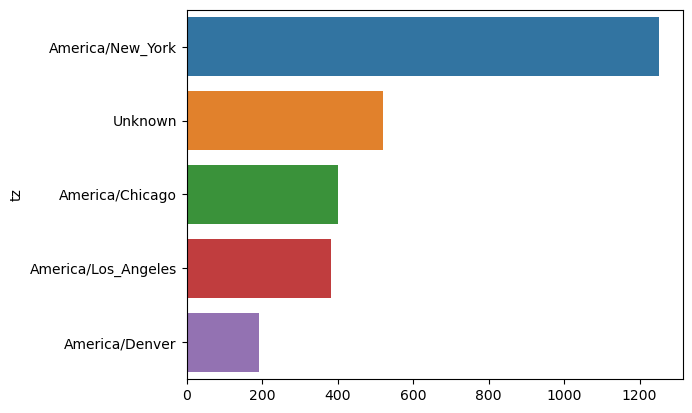

In [19]:
subset = tz_counts.head()

sns.barplot(y = subset.index, x = subset.values)
# sns.barplot(y = subset.index, x = subset.to_numpy())

a 필드에는 URL 단축을 실행하는 브라우저, 단말기, 어플리케이션에 대한 정보가 있다

In [20]:
frame['a'][1]
frame['a'][50]
frame['a'][51][:50]

'GoogleMaps/RochesterNY'

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

문자열의 첫 번째 토큰을 브라우저 종류를 파악할 수 있을 만큼만 잘라서 사용자 행동에 대한 또 다른 개요 만들기

In [21]:
# 'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'에서 Mozilla/5.0만 가지고 오겠다

results = pd.Series([x.split()[0] for x in frame['a'].dropna()]) # 공백을 기준으로 앞의 문자를 가지고 온다
results

results.value_counts().head()

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
Name: count, dtype: int64

윈도우 사용자와 비원도우 사용자 그룹으로 나누자

agent 문자열이 window를 포함하면 윈도우 사용자, agent 값이 없는 데이터는 제외

In [22]:
cframe = frame[~frame['a'].isnull()] # nan값이 아닌 데이터
cframe

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [23]:
# 각 행이 윈도우인지 아닌지
# np.where(조건, true일 때 반환, false일 때 반환)

cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
cframe['os'].value_counts()

os
Windows        2246
Not Windows    1194
Name: count, dtype: int64

In [24]:
# 표준 시간대와 운영체제 기준으로 묶는다

by_tz_os = cframe.groupby(['tz', 'os'])
agg_counts = by_tz_os.size().unstack().fillna(0) # 표로 재배열 후 null값을 0으로 채워라
agg_counts

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


전체 표준 시간대의 순위를 모아보자

-> agg_counts의 행 개수에서 간접 색인 배열을 구성한다 => agg_counts.sum('columns')를 이용해 행 개수를 계산 후 argsort()를 호출해 오름차순으로 정렬하는데 사용할 색인 배열 구하기

-> take를 사용해 정렬된 순서 그대로 행을 선택하고 마지막 10개 행만 잘라낸다

In [25]:
indexer = agg_counts.sum('columns').argsort()

indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55], dtype=int64)

In [26]:
count_subset = agg_counts.take(indexer[-10:])

count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


판다스에는 이와 똑같은 작업을 수행하는 nlargest

In [27]:
# nlargest : 큰 순서대로 정렬한다

agg_counts.sum(axis = 'columns').nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0


<Axes: xlabel='total', ylabel='tz'>

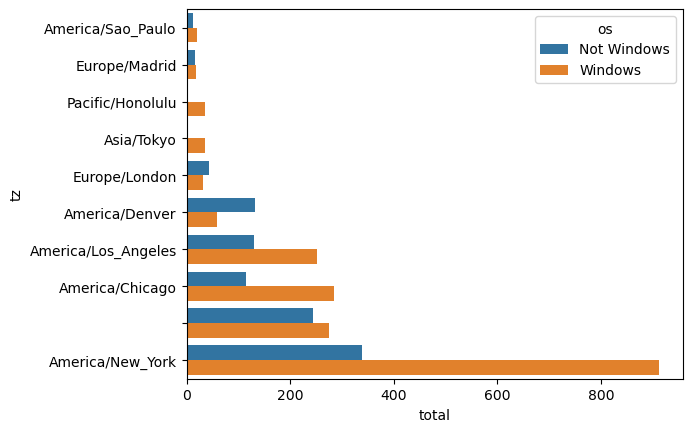

In [28]:
# 윈도우 사용자와 비윈도우 사용자 숫자를 비교하기

count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()

count_subset.head()

sns.barplot(x = count_subset['total'], y = count_subset['tz'], hue = count_subset['os'])
sns.barplot(data = count_subset, x = 'total', y = 'tz', hue = 'os')

각 행에서 총합을 1로 정규화한 뒤 다시 그리기

In [34]:
def norm_total(group):
    group['normed_total'] = group['total'] / group['total'].sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)

results.head(4)

tz           os  total  normed_total
tz                                                                   
                16                   Not Windows  245.0       0.47025
                17                       Windows  276.0       0.52975
America/Chicago 14  America/Chicago  Not Windows  115.0       0.28750
                15  America/Chicago      Windows  285.0       0.71250

<Axes: xlabel='normed_total', ylabel='tz'>

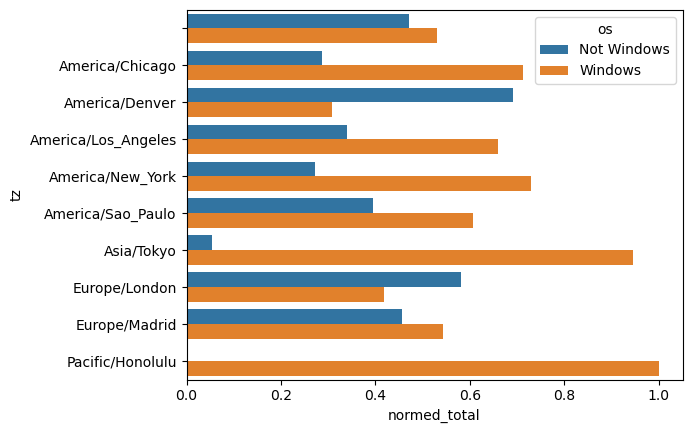

In [37]:
sns.barplot(data = results, x = 'normed_total', y = 'tz', hue = 'os')

In [40]:
# df.groupby().transform('sum') - 그룹화 한 데이터의 합계를 데이터프레임에 추가한다

g = count_subset.groupby('tz')
results2 = count_subset['total'] / g['total'].transform('sum')

results2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64

# 무비렌즈의 영화 평점 데이터

데이터셋은 평점, 사용자 정보, 영화 정보, 세가지 테이블로 나뉘어 있다

In [32]:
# 데이터 불러오기

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/users.dat', sep = '::',
                      header = None, names = unames, engine = 'python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/ratings.dat', sep = '::',
                         header = None, names = rnames, engine = 'python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/movies.dat', sep = '::', 
                       header = None, names = mnames, engine = 'python')

In [33]:
users.head()
ratings.head()
movies.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


나이와 성별에 따른 특정 영화의 평균 평점 계산

-> ratings, users, movies를 병합

In [34]:
data = pd.merge(ratings, users) # user_id로 병합
data = pd.merge(data, movies) # movie_id로 병합
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [35]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [51]:
# 성별에 따른 각 영화의 평균 평점 구하기
# 방법1. pivot_table 이용
# pivot_table(데이터 값, 행 인덱스, 열 인덱스, 데이터 집계 함수)

mean_ratings = data.pivot_table(values = 'rating', index = 'title', 
                                columns = 'gender', aggfunc = 'mean')

mean_ratings.head()

# 방법2. groupby 이용
mean_ratings = data.groupby(['gender', 'title'])['rating'].mean()
mean_ratings = mean_ratings.unstack().T

mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [49]:
# 250건 이상의 평점 정보가 있는 영화만 추리기

ratings_by_title = data.groupby('title')['rating'].size()
active_titles = ratings_by_title[ratings_by_title >= 250].index
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [54]:
# 250건 이상의 평점 정보가 있는 영화에 대한 색인은 mean_ratings에서 선택

mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [56]:
# 여성에게 높은 평점을 받은 영화 목록 확인

top_female_ratings = mean_ratings.sort_values('F', ascending = False)
top_female_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


## 평점 차이 구하기

남녀 간의 호불호가 갈리는 영화를 찾아보자

In [57]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

mean_ratings

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
...,...,...,...
Young Guns (1988),3.371795,3.425620,0.053825
Young Guns II (1990),2.934783,2.904025,-0.030758
Young Sherlock Holmes (1985),3.514706,3.363344,-0.151362


In [58]:
# 남성이 선호하는 영화

sorted_by_diff = mean_ratings.sort_values('diff', ascending = False)
sorted_by_diff

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
...,...,...,...
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Little Women (1994),3.870588,3.321739,-0.548849
Grease (1978),3.975265,3.367041,-0.608224


In [59]:
# 여성이 선호하는 영화

sorted_by_diff = mean_ratings.sort_values('diff')
sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
...,...,...,...
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608


성별에 관계없이 영화에 대한 호불호가 극명하게 나뉘는 영화 찾기

-> 호불호는 평점의 분산이나 표준편차 사용

In [60]:
# 영화별 평점의 표준편차를 계산하고 평점이 250건 이상인 영화만 

rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title[active_titles]
rating_std_by_title.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [61]:
rating_std_by_title.sort_values(ascending = False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

영화 장르에 따라 평점을 그룹화하기

-> str.split('|')를 이용하기

In [62]:
movies['genres'].head() 

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genres, dtype: object

In [63]:
movies['genres'].str.split('|')

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: genres, Length: 3883, dtype: object

In [64]:
movies['genre'] = movies['genres'].str.split('|')

movies.head()

,movie_id,title,genres,genre
0,1,Toy Story (1995),Animation|Children's|Comedy,"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama,"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


각 영화 장르별로 하나의 행을 갖는 새로운 DataFrame을 생성

=> explode 메서드는 리스트형태의 값을 여러 행으로 전개하는 메서드 입니다.

df.explode(column, ignore_index=False)

column : 전개할 리스트형태의 데이터가 있는 열 입니다.

ignore_index : True일 경우 기존 인덱스를 무시하고 0,1,2, ... , n 형태의 인덱스로 변환됩니다.


In [65]:
movies_explode = movies.explode('genre')

movies_explode

,movie_id,title,genres,genre
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Children's
...,...,...,...,...
3879,3949,Requiem for a Dream (2000),Drama,Drama
3880,3950,Tigerland (2000),Drama,Drama
3881,3951,Two Family House (2000),Drama,Drama
3882,3952,"Contender, The (2000)",Drama|Thriller,Drama


병합 후 장르별로 그룹화

In [66]:
ratings_with_genre = pd.merge(movies_explode, ratings)
ratings_with_genre = pd.merge(ratings_with_genre, users)

ratings_with_genre.iloc[0]

movie_id                                1
title                    Toy Story (1995)
genres        Animation|Children's|Comedy
genre                           Animation
user_id                                 1
rating                                  5
timestamp                       978824268
gender                                  F
age                                     1
occupation                             10
zip                                 48067
Name: 0, dtype: object

In [72]:
genre_ratings = ratings_with_genre.groupby(['age', 'genre'])['rating'].mean()
# genre_ratings.unstack('age')
genre_ratings = genre_ratings.unstack().T

genre_ratings

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


# 신생아 이름

In [2]:
names1880 = pd.read_csv('./data/yob1880.txt',
                        names = ['name', 'sex', 'births'])

names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


이 데이터는 각 연도별로 최소 5명 이상 중복되는 이름만 포함

성별별 출생 수를 모두 합한 값을 해당 연도의 전체 출생 수로 가정

In [4]:
# 성별별 출생 수

names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [31]:
# year 항목 추가

pieces = []

for year in range(1880, 2022):
    path = f'./data/names/yob{year}.txt'
    frame = pd.read_csv(path, names = ['name', 'sex', 'births'])
    
    # 연도 담을 열 추가
    frame['year'] = year
    pieces.append(frame)
    
# 하나의 frame로 합치기
names = pd.concat(pieces, ignore_index = True)

In [32]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2053238,Zyeire,M,5,2021
2053239,Zyel,M,5,2021
2053240,Zyian,M,5,2021
2053241,Zylar,M,5,2021


sex,F,M
year,,
2017,1724262,1848496
2018,1698373,1813377
2019,1675139,1790682
2020,1612393,1721588
2021,1635800,1743913


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

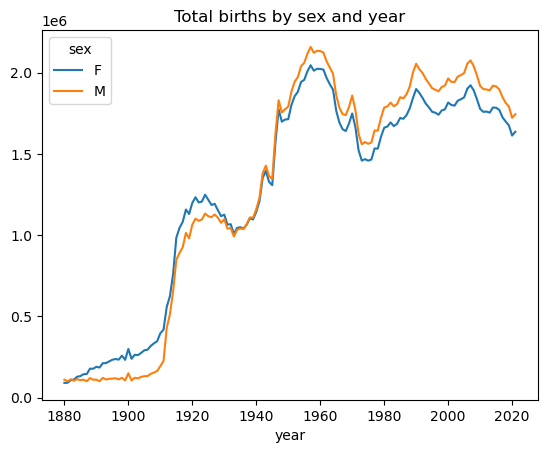

In [33]:
# 연도와 성별 별 출생 수 확인

# total_births = names.pivot_table('births', index = 'year', columns = 'sex', aggfunc = 'sum')
total_births = names.groupby(['year', 'sex'])['births'].sum()
total_births = total_births.unstack()

total_births.tail()

total_births.plot(title = 'Total births by sex and year')

In [34]:
# 전체 출생 수에서 차지하는 각 이름의 비율 계산

def add_prop(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

names = names.groupby(['year', 'sex'], group_keys = False).apply(add_prop)

names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2053238,Zyeire,M,5,2021,0.000003
2053239,Zyel,M,5,2021,0.000003
2053240,Zyian,M,5,2021,0.000003
2053241,Zylar,M,5,2021,0.000003


In [36]:
# prop열의 합이 1이 맞는지 확인 -> 온전성 검사

names.groupby(['year', 'sex'])['prop'].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2019  M      1.0
2020  F      1.0
      M      1.0
2021  F      1.0
      M      1.0
Name: prop, Length: 284, dtype: float64

분석에 사용할 각 연도별/성별에 다른 선호하는 이름 1,000개를 추출하자

In [39]:
def get_top1000(group):
    return group.sort_values('births', ascending = False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2021 M   2040181      Kacey   M     220  2021  0.000126
         2040182     Landry   M     220  2021  0.000126
         2040183     Ronnie   M     220  2021  0.000126
         2040184     Maxton   M     219  2021  0.000126
         2040187       Koen   M     218  2021  0.000125

[283876 rows x 5 columns]

In [41]:
# 분석에 필요 없는 그룹 색인 삭제

top1000 = top1000.reset_index(drop = True)

top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
283871,Kacey,M,220,2021,0.000126
283872,Landry,M,220,2021,0.000126
283873,Ronnie,M,220,2021,0.000126
283874,Maxton,M,219,2021,0.000126


## 이름 유행 분석

In [43]:
boys = top1000[top1000['sex'] == 'M']
girlss = top1000[top1000['sex'] == 'F']

In [45]:
total_births = top1000.pivot_table('births', index = 'year', columns = 'name', aggfunc = sum)

total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Aayan,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,7.0,NaN,8.0,28.0,NaN,27.0,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,241.0,291.0,4188.0,NaN,526.0,NaN,7212.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,851.0,NaN,301.0,NaN
2018,NaN,NaN,3836.0,NaN,488.0,NaN,5986.0,NaN,NaN,NaN,...,277.0,NaN,NaN,269.0,NaN,NaN,1131.0,NaN,323.0,NaN
2019,NaN,NaN,3661.0,NaN,419.0,NaN,5534.0,NaN,NaN,209.0,...,266.0,NaN,NaN,353.0,NaN,NaN,1181.0,NaN,540.0,213.0


In [47]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 1880 to 2021
Columns: 7279 entries, Aaden to Zyon
dtypes: float64(7279)
memory usage: 7.9 MB


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

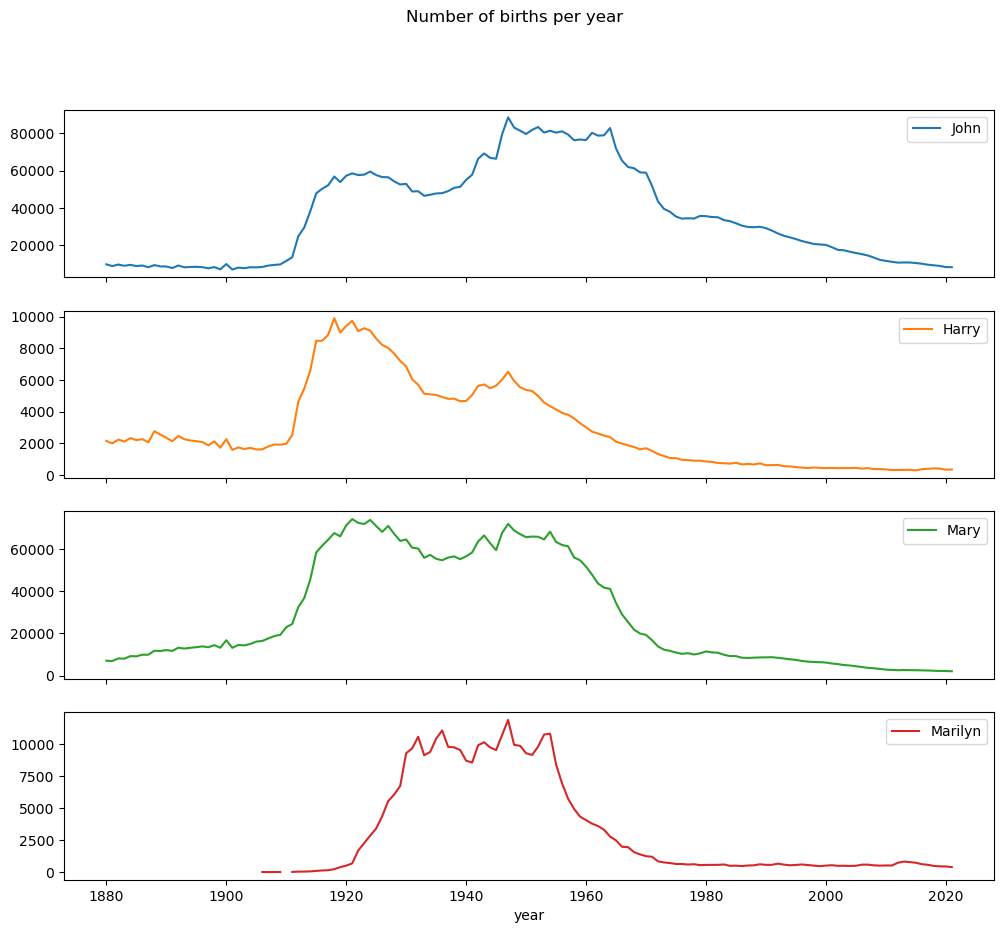

In [49]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

subset.plot(subplots = True, figsize = (12, 10),
           title = 'Number of births per year')

### 이름의 다양성 증가

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2017,0.740698,0.833591
2018,0.741403,0.829435
2019,0.739471,0.825434


<Axes: title={'center': 'Sum of table 1000.prop by year and sex'}, xlabel='year'>

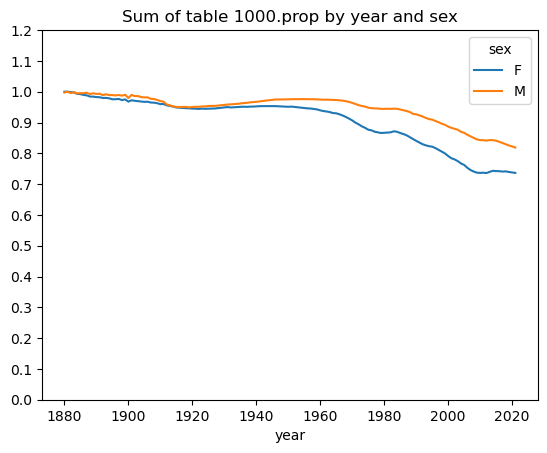

In [52]:
# 인기 있는 이름 1000개가 전체 출생 수에서 차지하는 비율을 연도별/성별 그래프로 그려보자

table = top1000.pivot_table('prop', index = 'year', columns = 'sex', aggfunc = sum)

table

table.plot(title = 'Sum of table 1000.prop by year and sex',
          yticks = np.linspace(0, 1.2, 13))

In [54]:
# 전체 출생 수의 50%를 차지하는 인기 있는 이름의 개수 

df = boys[boys['year'] == 2010]

df

,name,sex,births,year,prop
260876,Jacob,M,22144,2010,0.011547
260877,Ethan,M,18011,2010,0.009392
260878,Michael,M,17374,2010,0.009059
260879,Jayden,M,17192,2010,0.008964
260880,William,M,17064,2010,0.008898
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [61]:
prop_cumsum = df['prop'].sort_values(ascending = False).cumsum() # cumsum : 누계
prop_cumsum[:10]

prop_cumsum.searchsorted(0.5) # searchsorted : 정렬된 상태에서 누계가 0.5가 되는 위치 구하기
print('인덱스는 0부터 시작이라 결과에 1을 더해야 한다 => 116이 아닌 117이다')

40876    0.065319
40877    0.122332
40878    0.170479
40879    0.206385
40880    0.233619
40881    0.259011
40882    0.283693
40883    0.306800
40884    0.324876
40885    0.342194
Name: prop, dtype: float64

24

인덱스는 0부터 시작이라 결과에 1을 더해야 한다 => 116이 아닌 117이다


In [60]:
df = boys[boys.year == 1900]

in1990 = df.sort_values('prop', ascending = False).prop.cumsum()
in1990.searchsorted(0.5) + 1 # 인덱스는 0부터 시작이라

25

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Axes: title={'center': 'Number og popular names in top 505'}, xlabel='year'>

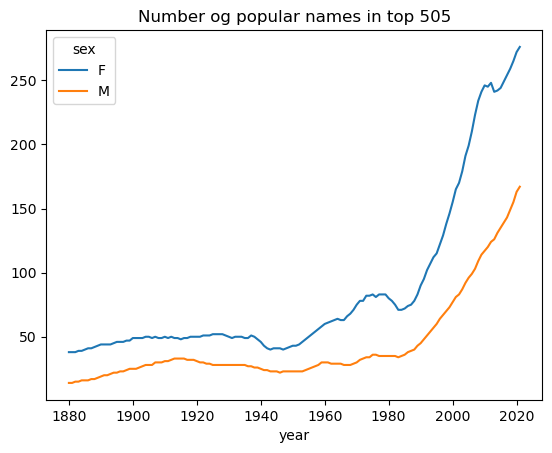

In [65]:
# 위 연산을 연도별/성별 조합에 적용

def get_quantile_count(group, q = 0.5):
    group = group.sort_values('prop', ascending = False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack()

diversity.head()
diversity.plot(title = 'Number og popular names in top 505')

### 마지막 글자의 변화

In [69]:
def get_last_letter(x):
    return x[-1]

last_letters = names['name'].map(get_last_letter)
last_letters.names = 'last_letter'

table = names.pivot_table('births', index = last_letters, columns = ['sex', 'year'], aggfunc = sum)

In [73]:
subtable = table.reindex(columns = [1910, 1960, 2010], level = 'year')

subtable.head()

sex          F                            M                    
year      1910      1960      2010     1910      1960      2010
name                                                           
a     108399.0  691323.0  677323.0    977.0    5217.0   28896.0
b          NaN     694.0     455.0    411.0    3911.0   39304.0
c          5.0      49.0     958.0    482.0   15458.0   23364.0
d       6751.0    3731.0    2645.0  22112.0  262131.0   44864.0
e     133599.0  435008.0  317005.0  28665.0  178762.0  130348.0

In [76]:
# 전체 출생 수에서 성별별로 각각의 마지막 글자가 차지하는 비율을 계산 => 전체 츨생 수로 정규화

subtable.sum()

sex  year
F    1910     396503.0
     1960    2022061.0
     2010    1776636.0
M    1910     194209.0
     1960    2132230.0
     2010    1917792.0
dtype: float64

In [79]:
letter_prop = subtable / subtable.sum()

letter_prop.head()

sex          F                             M                    
year      1910      1960      2010      1910      1960      2010
name                                                            
a     0.273388  0.341890  0.381239  0.005031  0.002447  0.015067
b          NaN  0.000343  0.000256  0.002116  0.001834  0.020494
c     0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d     0.017026  0.001845  0.001489  0.113857  0.122937  0.023394
e     0.336943  0.215131  0.178430  0.147599  0.083838  0.067968

<Axes: title={'center': 'Male'}, xlabel='name'>

<Axes: title={'center': 'Female'}, xlabel='name'>

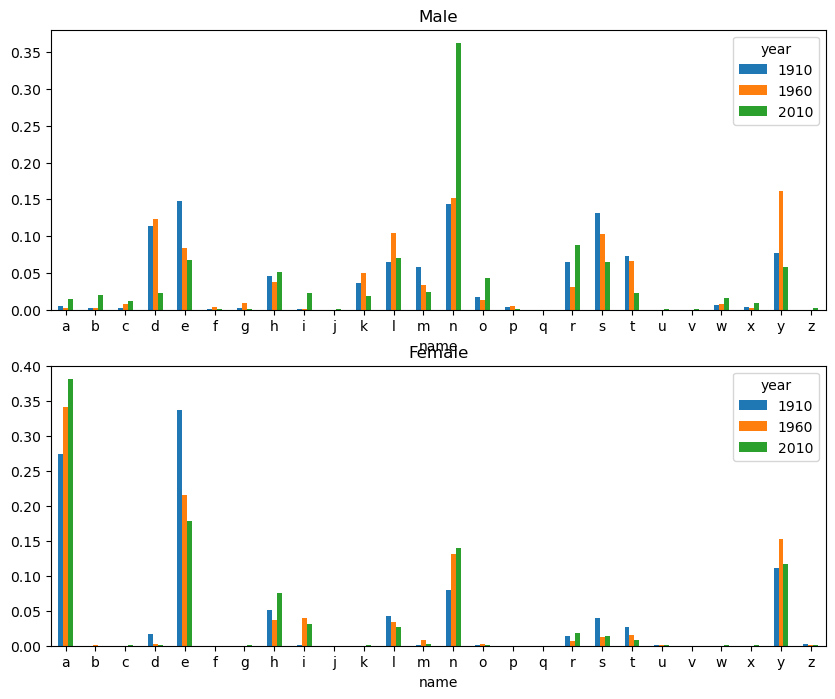

In [83]:
# 이렇게 구한 마지막 글자 비율로 성별과 출생 연도에 대한 막대그래프 그리기

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize = (10, 8))
letter_prop['M'].plot(kind = 'bar', rot = 0, ax = axes[0], title = 'Male')
letter_prop['F'].plot(kind = 'bar', rot = 0, ax = axes[1], title = 'Female')

In [85]:
# 출생 연도와 성별로 정규화 한 후, 남자아이 이름에서 몇 가지 글자를 선택한 뒤 각 열을 시계열로 변한

letter_prop = table / table.sum()

dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

dny_ts

name,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408
...,...,...,...
2017,0.022809,0.337859,0.049949
2018,0.023095,0.333490,0.048823
2019,0.022800,0.323724,0.048088


<Axes: xlabel='year'>

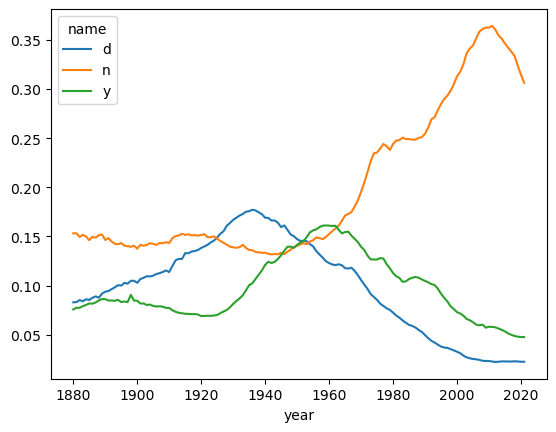

In [86]:
dny_ts.plot()

### 남자 이름과 여자 이름이 서로 바뀐 경우

In [90]:
# top1000 데이터로 lesl로 시작하는 이름 목록 만들기

all_names = pd.Series(top1000['name'].unique())
lesley_like = all_names[all_names.str.contains('Lesl')]

lesley_like

632     Leslie
2293    Lesley
4263    Leslee
4730     Lesli
6105     Lesly
dtype: object

In [92]:
# 이 이름을 뺀 후 이름별로 출생 수를 구하고 상대도수 확인

filtered = top1000[top1000['name'].isin(lesley_like)]
filtered.groupby('name')['births'].sum()

name
Leslee       993
Lesley     35039
Lesli        929
Leslie    379720
Lesly      11434
Name: births, dtype: int64

In [96]:
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2461,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4511,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
274325,Leslie,F,703,2017,0.000408
276396,Leslie,F,600,2018,0.000353
278412,Leslie,F,571,2019,0.000341
280473,Leslie,F,486,2020,0.000301


In [94]:
# 성별과 연도별로 모은 다음, 출생 연도로 정규화

table = filtered.pivot_table('births', index = 'year', columns = 'sex', aggfunc = 'sum')
table = table.div(table.sum(axis = 'columns'), axis = 'index')

table.tail()

sex,F,M
year,,
2017,1.0,NaN
2018,1.0,NaN
2019,1.0,NaN
2020,1.0,NaN
2021,1.0,NaN


<Axes: xlabel='year'>

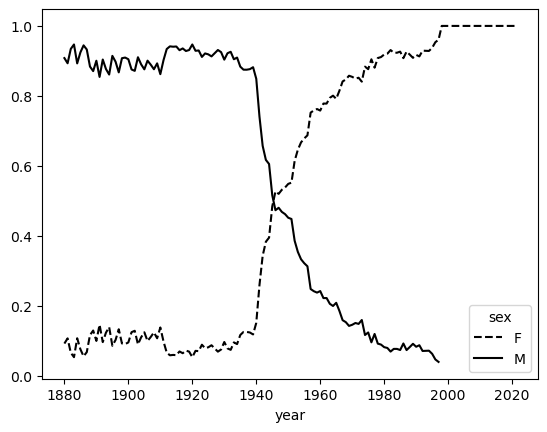

In [95]:
table.plot(style = {'M' : 'k-', 'F' : 'k--'})

# 미국 농무부 영양소 정보

In [2]:
import json

db = json.load(open('./data./database.json'))

len(db)

6636

In [3]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [6]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [8]:
# nutrients필드는 한 가지 영양소에 대한 정보

nutrients = pd.DataFrame(db[0]['nutrients'])

nutrients.head()

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy


In [11]:
# 음식의 이름과 그룹, ID, 제조사를 추출

info_keys = ['description', 'group', 'id', 'manufacturer']

info = pd.DataFrame(db, columns = info_keys)

info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [14]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [18]:
# manufacturer열에 누락된 값 처리
# 음식 그룹의 분포 확인

#info.value_counts('group')
info.groupby('group').size().sort_values(ascending = False)

group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and

In [54]:
# 각 음식의 영양소 정보를 하나의 테이블로 만들기

nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
    
nutrients = pd.concat(nutrients, ignore_index = True)

nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [24]:
# 중복확인

nutrients.duplicated().sum()

14179

In [25]:
# 중복 제거

nutrients = nutrients.drop_duplicates()

In [26]:
col_mapping = {'description' : 'food',
               'group' : 'fgroup'}

info = info.rename(columns = col_mapping, copy = False)

info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [28]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}

nutrients = nutrients.rename(columns = col_mapping, copy = False)

nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [31]:
# ifno와 nutrients 데이터 병합

ndata = pd.merge(nutrients, info, on = 'id')

ndata.info()
ndata.iloc[30000]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB


value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

<Axes: ylabel='fgroup'>

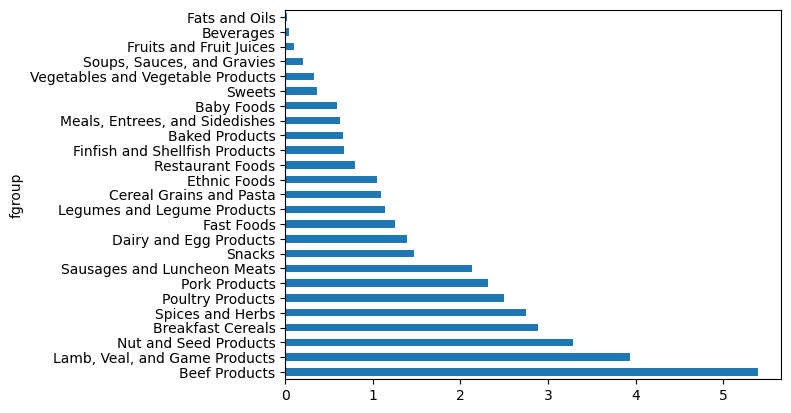

In [38]:
# 음식 그룹과 영양소 종류별 중앙값 그래프 그리기

result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

result['Zinc, Zn'].sort_values(ascending = False).plot(kind = 'barh')

In [51]:
# 각 영양소가 어떤 음식에 가장 많이 들어 있는지 확인
  

value  \
nutgroup    nutrient                                 
Amino Acids Alanine                          8.009   
            Arginine                         7.436   
            Aspartic acid                   10.203   
            Cystine                          1.307   
            Glutamic acid                   17.452   
...                                            ...   
Vitamins    Vitamin D2 (ergocalciferol)     28.100   
            Vitamin D3 (cholecalciferol)    27.400   
            Vitamin E (alpha-tocopherol)   149.400   
            Vitamin E, added                46.550   
            Vitamin K (phylloquinone)     1714.500   

                                                                                       food  
nutgroup    nutrient                                                                         
Amino Acids Alanine                                       Gelatins, dry powder, unsweetened  
            Arginine                                           Seeds, sesame flour, low-fat  
            Aspartic acid                                               Soy protein isolate  
            Cystine                            Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                                               Soy protein isolate  
...                                                                                     ...  
Vitamins    Vitamin D2 (ergocalciferol)                             Mushrooms, maitake, raw  
            Vitamin D3 (cholecalciferol)                      Fish, halibut, Greenland, raw  
            Vitamin E (alpha-tocopherol)                                    Oil, wheat germ  
            Vitamin E, added              Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...  
            Vitamin K (phylloquinone)                                  Spices, sage, ground  

[94 rows x 2 columns]

In [53]:
# 아미노산에 대한 내용만

max_foods.loc['Amino Acids']

,value,food
nutrient,,
Alanine,8.009,"Gelatins, dry powder, unsweetened"
Arginine,7.436,"Seeds, sesame flour, low-fat"
Aspartic acid,10.203,Soy protein isolate
Cystine,1.307,"Seeds, cottonseed flour, low fat (glandless)"
Glutamic acid,17.452,Soy protein isolate
Glycine,19.049,"Gelatins, dry powder, unsweetened"
Histidine,2.999,"Whale, beluga, meat, dried (Alaska Native)"
Hydroxyproline,0.803,"KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA..."
Isoleucine,4.300,"Soy protein isolate, PROTEIN TECHNOLOGIES INTE..."


# 2012년 연방선거관리위원회 데이터베이스

In [56]:
fec = pd.read_csv('./data/P00000001-ALL.csv', low_memory = False)

fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [106]:
fec.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'party'],
      dtype='object')

In [57]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

정당 가입 여부와 관련된 데이터가 없으므로 추가

In [60]:
# unique 메서드를 이용해 모든 정당의 후보자 목록을 얻자

unique_cands = fec['cand_nm'].unique()

unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [64]:
# 소속 정당은 딕셔너리를 이용해 표시

parties = {'Bachmann, Michelle' : 'Republican',
           'Cain, Herman' : 'Republican',
           'Gingrich, Newt' : 'Republican',
           'Huntsman, Jon' : 'Republican',
           'Johnson, Gary Earl' : 'Republican',
           'McCotter, Thaddeus G' : 'Republican',
           'Obama, Barack' : 'Democrat',
           'Paul, Ron' : 'Republican',
           'Pawlenty, Timothy' : 'Republican',
           'Perry, Rick' : 'Republican',
           "Roemer, Charles E. 'Buddy' III" : 'Republican',
           'Romney, Mitt' : 'Republican',
           'Santorum, Rick' : 'Republican'}

In [65]:
# map 함수를 사용하여 후보 이름으로부터 정당 배열을 계산

fec['party'] = fec['cand_nm'].map(parties)

fec['party'].value_counts()

party
Democrat      593746
Republican    407985
Name: count, dtype: int64

In [67]:
(fec['contb_receipt_amt'] >0).value_counts()

# 기부 금액이 양수인 데이터만 가져오기

fec = fec[fec['contb_receipt_amt'] > 0]

contb_receipt_amt
True     991475
False     10256
Name: count, dtype: int64

In [69]:
# 오바마와 롬니가 양대 후보이므로 두 후보의 기부금 정보 

fec_mrbo = fec[fec['cand_nm'].isin(['Obama, Barack', 'Romney, Mitt'])]

fec_mrbo

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,091280020,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,090120092,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701381,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,NaN,NaN,NaN,SA17A,787803,Democrat
701382,C00431445,P80003338,"Obama, Barack","TAITANO, TYRONE",HAGATNA,ZZ,969323373,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,Democrat
701383,C00431445,P80003338,"Obama, Barack","TUCKER, PAMELA",APO,ZZ,963190030,DODEA,EDUCATOR,3.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,Democrat
701384,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,NaN,NaN,NaN,SA17A,785239,Democrat


## 직업과 고용주에 따른 기부 통계

In [72]:
# 직업별 전체 기부 숫자 구하기

fec['contbr_occupation'].value_counts()[:10]

contbr_occupation
RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: count, dtype: int64

In [77]:
# 직업 이름이 이상하게 매핑 -> 수정
# dict.get()을 사용하여 매핑 정보가 없으면 그대로 사용

occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.' : 'CEO'
}

def get_occ(x):
    return occ_mapping.get(x, x) # 매핑이 없으면 x를 반환

fec['contbr_occupation'] = fec['contbr_occupation'].map(get_occ)

In [81]:
# 고용주에 대해서도 동일하게 처리

emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED'
}

def get_emp(x):
    return emp_mapping.get(x, x)

fec['contbr_employer'] = fec['contbr_employer'].map(get_emp)

In [98]:
# 정당과 직업별로 데이터를 집계한 후 최소 2백만 불 이상 기부한 직업만

by_occupation = fec.pivot_table('contb_receipt_amt', index = 'contbr_occupation', columns = 'party', aggfunc = 'sum')

over_2mm = by_occupation[by_occupation.sum(axis = 'columns') > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


<Axes: ylabel='contbr_occupation'>

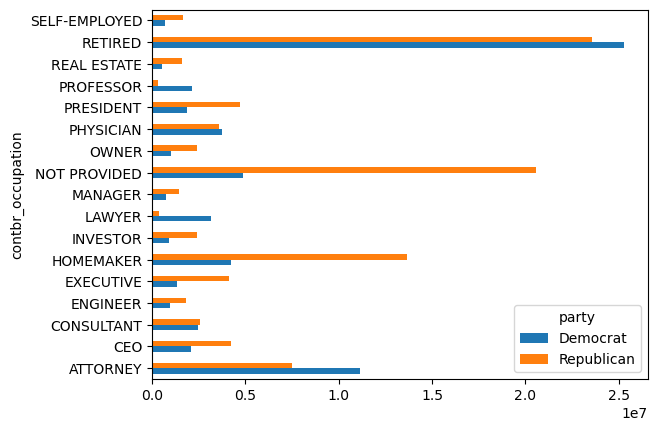

In [99]:
over_2mm.plot(kind = 'barh')

오바마 후보와 롬니 후보별로 가장 많은 금액을 기부한 직군을 알아보자

In [103]:
# 후보 이름으로 그룹을 묶고 앞에 사용했던 번형된 top 메서드 이용

def get_top_amounts(group, key, n = 5):
    totals = group.groupby(key)['contb_receipt_amt'].sum() # key별로 그룹화 한 후 기부 금액 합계
    return totals.nlargest(n) # n개 만큼 큰 것을 가져옴

In [104]:
# 직업과 고용주에 따라 집계

grouped = fec_mrbo.groupby('cand_nm') # 이름으로 그룹(오바마, 롬니)
grouped.apply(get_top_amounts, 'contbr_occupation', n = 7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

## 기부 금액 통계

In [107]:
# cut 함수를 사용해 기부 규모별로 버킷을 만들고 기부자 수를 분할

bins = np.array([0, 1, 10, 100, 1000, 10000,
                100_000, 1_000_000, 10_000_000])

labels = pd.cut(fec_mrbo['contb_receipt_amt'], bins)

labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [140]:
# 오바마와 롬니 후보 데이터를 이름과 버킷 이름으로 그룹지어 기부 금액 규모에 따른 히스토그램

grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(level = 0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


<Axes: ylabel='contb_receipt_amt'>

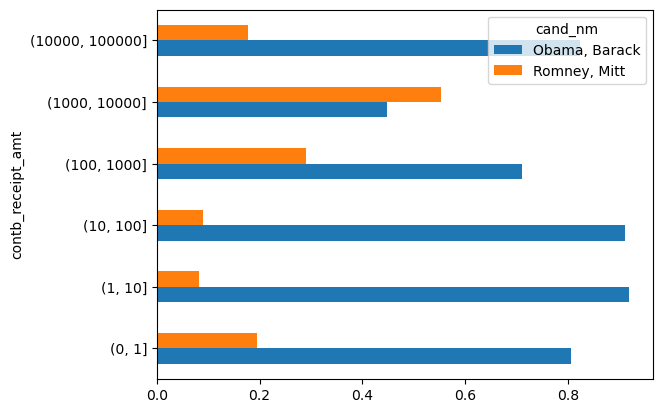

In [149]:
# 버킷별로 정규화해서 후보별 전체 기부 금액 비율 시각화

bucket_sums = grouped['contb_receipt_amt'].sum().unstack().T

normed_sums = bucket_sums.div(bucket_sums.sum(axis = 'columns'), axis = 'index')
normed_sums

normed_sums[:-2].plot(kind = 'barh')

## 주별 기부 통계

In [157]:
# 후보자와 주 별로 데이터 집계

grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st']) # 후보자와 주로 묶기
totals = grouped['contb_receipt_amt'].sum().unstack().T.fillna(0) # 후보자와 주 별로 기부금의 합계, 누락값은 0으로 채우기
totals = totals[totals.sum(axis = 1) > 100000] # 주별 기부금이 100000이상인 값

totals.head()

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60


In [159]:
# 각 행을 전체 기부 금액으로 나누면 각 후보에 대한 주별 전체 기부 금액의 상대적인 비율

percent = totals.div(totals.sum(axis = 1), axis = 0)

percent.head()

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
